In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import csv
# import json
import copy

In [2]:
import random

bases = ['A', 'C', 'T', 'G']
bases_T = ['A', 'C', 'G']
start_codon = 'ATG'  # Fixed as a string, not a list
stop_codons = ['TGA', 'TAG', 'TAA']
gen_len = 51

# table = { 
#             'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 
#             'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T', 
#             'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 
#             'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                  
#             'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 
#             'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P', 
#             'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 
#             'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R', 
#             'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 
#             'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A', 
#             'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 
#             'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G', 
#             'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 
#             'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L', 
#             'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_', 
#             'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W', 
#         } 

## CHANGED THE STOP CODONS TO G,C,P FOR THE NEUTRAL SO I DONT HAVE _ IN THE AMINO ACID LIST

table = { 
            'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 
            'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T', 
            'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 
            'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                  
            'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 
            'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P', 
            'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 
            'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R', 
            'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 
            'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A', 
            'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 
            'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G', 
            'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 
            'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L', 
            'TAC':'Y', 'TAT':'Y', 'TAA':'G', 'TAG':'C', 
            'TGC':'C', 'TGT':'C', 'TGA':'P', 'TGG':'W', 
        } 

hydrophilic = ['R', 'N', 'D', 'Q', 'E', 'H', 'K', 'S', 'T']

hydrophobic = ['A', 'I', 'L', 'M', 'F', 'W', 'Y', 'V']

neutral = ['G', 'C', 'P']

class indiv:  # genome, fitness, constructor, print, ...
    def __init__(self):  # constructor
        self.fitness = 0

        # generates random mutations of length 51
        self.genome = []
        self.amino_acid = []
        for i in range(0, gen_len):
            self.genome.append(random.choice(bases))
        
        for i in range (0, len(self.genome), 3):
            codon = ''.join(self.genome[i:i + 3]) 
            amino_acid = table.get(codon)
            self.amino_acid.append(amino_acid)
        
        # print('Original genome = ', ''.join(self.genome))

    def to_amino_acid(self):
        self.amino_acid = []
        for i in range (0, len(self.genome), 3):
            codon = ''.join(self.genome[i:i + 3])  # Extract a
            # print('codon = ', codon)
            amino_acid_find = table.get(codon)
            # print('amino_acid = ', amino_acid)
            self.amino_acid.append(amino_acid_find)
        return self.amino_acid
            
    def print(self):
        print(''.join(self.genome))
        print("fitness = ", self.fitness)

    def __str__(self):
        return_str = ''.join(self.genome)
        return_str += "\nfitness = " + str(self.fitness)
        return return_str

    def copy(self, source):
        self.genome = source.genome.copy()  # Efficient copy of genome
        self.amino_acid = source.amino_acid.copy()

    # One-point crossover
    # def crossover(self, other):
    #     crossPoint = random.randint(0, len(self.genome) - 1)
    #     for i in range(crossPoint, len(self.genome)):
    #         print('temp1 = ', len(self.genome))
    #         temp = self.genome[i]
    #         print('temp2 = ', len(other.genome))

    #         self.genome[i] = other.genome[i]
    #         other.genome[i] = temp

    def crossover(self, other):
        # Determine the minimum length of the two genomes
        min_len = min(len(self.genome), len(other.genome))
        
        # Select a random crossover point within the valid range
        crossPoint = random.randint(0, min_len - 1)
        
        # Perform the crossover operation up to the minimum length
        for i in range(crossPoint, min_len):
            temp = self.genome[i]
            self.genome[i] = other.genome[i]
            other.genome[i] = temp

        ### Check if the genome is divisible by 3. If not, remove the last nucleic acid
        # because it will not be able to form a codon. Returns none for amino acid. This makes things easier
        if len(self.genome) % 3 != 0:
            self.genome = self.genome[:len(self.genome) - 1]
            
        if len(self.genome) % 3 != 0:
            self.genome = self.genome[:len(self.genome) - 1]
        
        # if len(self.genome) % 3 != 0:
        #     self.genome = self.genome[:len(self.genome) - 1]
        
        self.amino_acid = self.to_amino_acid()
        other.amino_acid = other.to_amino_acid()



    def insertion(self):
        new_gene = []
        new_genome = []
        start = random.randint(0, len(self.genome) - 1)
        for i in range(3):
            new_gene += random.choice(bases)
        new_genome = self.genome[:start] + new_gene + self.genome[start:]
        self.genome = new_genome
        # print('insert_genome = ', ''.join(new_genome))
        self.amino_acid = self.to_amino_acid()
        # print('insert_aa = ', ''.join(self.amino_acid))


    def deletion(self):
        new_genome = []
        start = random.randint(0, len(self.genome) - 1)
        length = 3 #only 3 nucleic acids can be deleted
        new_genome = self.genome[:start] + self.genome[start + length:]
        self.genome = new_genome
        # print('delete_genome = ', ''.join(new_genome))
        self.amino_acid = self.to_amino_acid()
        # print('delete_aa = ', ''.join(new_genome))

         
    def mutate(self):
        first_25 = round(len(self.genome) * .25)
        first_75 = round(len(self.genome) * .75)
        first_100 = len(self.genome)

        # print("first_25 = ", first_25)
        # print("first_75 = ", first_75)
        # print("first_100 = ", first_100)

        genome_25 = self.genome[:first_25]
        genome_75 = self.genome[first_25:first_75]
        genome_100 = self.genome[first_75:]

        for codon in range(0, first_25, 3):
            if table.get(''.join(self.genome[codon:codon + 3])) in hydrophobic:
                # Mutate randomly 3 genes within the first 25 percent of the genome
                for i in range(3):
                    self.genome[random.randint(0, first_25 - 1)] = random.choice(bases)
            else:
                pass
            
        for codon in range(first_25, first_75, 3):
            if table.get(''.join(self.genome[codon:codon + 3])) in hydrophilic:
                # Mutate randomly 3 genes within the first 25 percent of the genome
                for i in range(3):
                    self.genome[random.randint(first_25, first_75 - 1)] = random.choice(bases)
            else:
                pass

        for codon in range(first_75, first_100, 3):
            if table.get(''.join(self.genome[codon:codon + 3])) in hydrophobic:
                # Mutate randomly 3 genes within the first 25 percent of the genome
                for i in range(3):
                    self.genome[random.randint(first_75, first_100 - 1)] = random.choice(bases)
            else:
                pass

        self.amino_acid = self.to_amino_acid()

    
    def calcFitness(self):
        # Fitness is the range between the start and stop codon. Fitness is counted by three.
        self.fitness = 0

        # Search for the start and stop codons
        genome_str = self.amino_acid

        # print("25: ", round(len(genome_str) *.25))

        for i in range(0, round(len(genome_str) *.25)):
            if genome_str[i] in hydrophilic:
                self.fitness += 1
            elif genome_str[i] in hydrophobic:
                self.fitness -= 1
            elif genome_str[i] in neutral:
                self.fitness += 0

        # print("25: ", round(len(genome_str) *.25), "75: ", round(len(genome_str) *.75))


        for i in range(round(len(genome_str) *.25), round(len(genome_str) *.75)):
            if genome_str[i] in hydrophilic:
                self.fitness -= 1
            elif genome_str[i] in hydrophobic:
                self.fitness += 1
            elif genome_str[i] in neutral:
                self.fitness += 0

        for i in range(round(len(genome_str) *.75), len(genome_str)):
            if genome_str[i] in hydrophilic:
                self.fitness += 1
            elif genome_str[i] in hydrophobic:
                self.fitness -= 1
            elif genome_str[i] in neutral:
                self.fitness += 0
        
        # print("75: ", round(len(genome_str) *.75), "100: ", len(genome_str) - 1)


        return self.fitness



In [3]:
popSize = 50
class pop:
    def __init__(self):  # constructor
        self.population = []
        for i in range(0, popSize):
            self.population.append(indiv())
        self.bestFit = 0 # best fitness
        self.best = 0 # index of best individual
        self.avgFit = 0
        self.calcStats()


    def generation(self):
        tempPop = pop()
        num = -1
        for i in range(0,popSize,2):

            p1 = self.tourn() # tournament selection
            p2 = self.tourn()

            tempPop.population[i].copy(self.population[p1])
            tempPop.population[i+1].copy(self.population[p2])

            num = random.randint(0,1)
            ## Population mutation either insertion or deletion on a coin flip 
            if(num == 0):
                tempPop.population[i].insertion()
                tempPop.population[i+1].insertion()
            elif(num == 1):
                tempPop.population[i].deletion()
                tempPop.population[i+1].deletion()

            tempPop.population[i].crossover(tempPop.population[i+1])
            
            tempPop.population[i].mutate()
            tempPop.population[i+1].mutate()
        for i in range(0,popSize):
            self.population[i].copy(tempPop.population[i])

    def tourn(self):
        best = random.randint(0,popSize-1) # the winner so far
        bestfit = self.population[best].fitness # best fit so far
        for i in range(5): # tournament size of 6!!!!
            p2 = random.randint(0,popSize-1)
            if(self.population[p2].fitness > bestfit):
                bestfit = self.population[p2].fitness
                best = p2
        return best

    def calcStats(self):
        self.avgFit = 0
        self.population[0].calcFitness()
        self.bestFit = self.population[0].fitness
        self.best = 0
        for i in range(len(self.population)):
            self.population[i].calcFitness() # update fitnesses
            if(self.population[i].fitness > self.bestFit): # compare fitness to best
                self.bestFit = self.population[i].fitness
                self.best = i
            self.avgFit += self.population[i].fitness
        self.avgFit = self.avgFit/len(self.population)

    # Function that returns a randome genome from population size when called
    def randGenome(self):
        return self.population[random.randint(0,popSize-1)]

    def clear(self):
        ## clear the population back to zero
        self.population = []
        


In [4]:
p = pop()  # Initialize a new population for each run
best_array = []
fit_array = []
gen_array = []
pop_array = [] 

gen_time = 100
for g in range(gen_time):
    p.generation()
    p.calcStats()
    best_array.append(p.population[p.best].fitness)
    fit_array.append(p.avgFit)
    # gen_array.append(p.population)

    pop_array.append(p.population)

    # Every 10th generations, randomly adds a genome from the population to the gen_array
    if (g+1) % 10 == 0:
        print("Generation: ", g + 1)
        print("Adding a genome to the gen_array")
        # gen_array.append(p.randGenome())
        gen_array.append(p.population[p.best])

    



Generation:  10
Adding a genome to the gen_array
Generation:  20
Adding a genome to the gen_array
Generation:  30
Adding a genome to the gen_array
Generation:  40
Adding a genome to the gen_array
Generation:  50
Adding a genome to the gen_array
Generation:  60
Adding a genome to the gen_array
Generation:  70
Adding a genome to the gen_array
Generation:  80
Adding a genome to the gen_array
Generation:  90
Adding a genome to the gen_array
Generation:  100
Adding a genome to the gen_array


In [5]:
gen_table = {}

gen_table["Amino Acid"] = [''.join(gen_array[i].amino_acid) for i in range(len(gen_array))]
gen_table["Fitness"] = [gen_array[i].fitness for i in range(len(gen_array))]

gen_table = pd.DataFrame(gen_table)

In [12]:
pd.DataFrame(gen_table).to_csv("gen_table.csv", index=False)

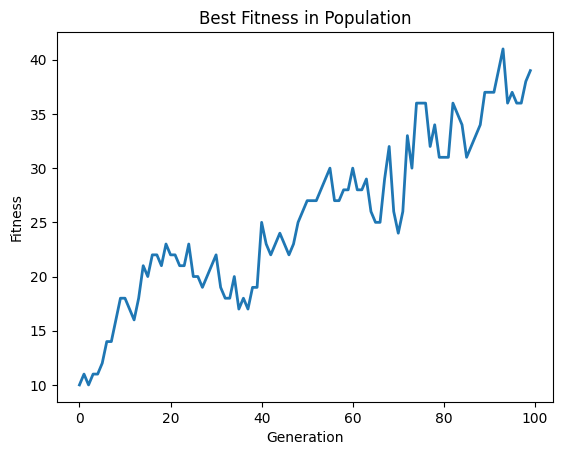

In [7]:
t = np.arange(0, gen_time, 1)
plt.plot(t, best_array, marker='', linewidth=2)
plt.title("Best Fitness in Population")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

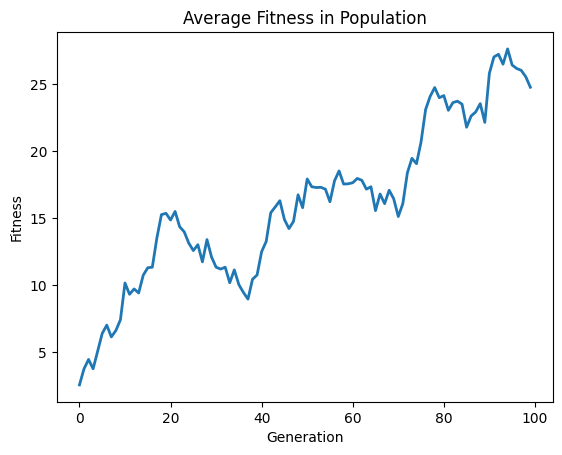

In [8]:
t = np.arange(0, gen_time, 1)
plt.plot(t, fit_array, marker='', linewidth=2)
plt.title("Average Fitness in Population")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

In [9]:
gen_array

In [10]:
# # Run each generation time 10 times
# num_runs = 10
# generation_time = [10, 30, 50, 70, 100, 200, 300, 500]

# all_best_fitness = {gen_time: [] for gen_time in generation_time}
# all_avg_fitness = {gen_time: [] for gen_time in generation_time}



# for gen_time in generation_time:
#     for run in range(num_runs):
#         p = pop()  # Initialize a new population for each run
#         best_array = []
#         fit_array = []
#         for g in range(gen_time):
#             p.generation()
#             p.calcStats()
#             best_array.append(p.population[p.best].fitness)
#             fit_array.append(p.avgFit)
#         all_best_fitness[gen_time].append(best_array)
#         all_avg_fitness[gen_time].append(fit_array)

# # Plotting
# def plot_average_fitness(gen_time, fitness, fit_type, popSize, title):
#     fig, axes = plt.subplots(4, 2, figsize=(16, 16), dpi=150, height_ratios=[1, 1, 2, 2], width_ratios=[2, 2])
#     axes = axes.flatten()
#     palette = plt.get_cmap('Set2')

#     for num, gen_time in enumerate(fitness):
#         t = np.arange(0, gen_time, 1)
#         ax = axes[num]
#         avg_fitness = np.mean(fitness[gen_time], axis=0)
#         ax.plot(t, avg_fitness, marker='', linewidth=2, color=palette(num))
#         ax.set_title(f'{gen_time} generations', loc='center', fontsize=12, fontweight=0, color=palette(num))
#         if num in [6, 7]:
#             ax.set_xlabel('Generations')
#         if num in [0, 2, 4, 6]:
#             ax.set_ylabel('Fitness')

#     plt.suptitle(f'Average{fit_type} Fitness of population size {popSize} over different generations',
#                  fontsize=16, color="black")
#     fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.savefig(f'{title}.png')
#     plt.show()

# plot_average_fitness(generation_time, all_avg_fitness, "", popSize, f"start_pop_{popSize} avg_fitness_one_mutate")
# plot_average_fitness(generation_time, all_best_fitness, " Best", popSize, f"start_pop_{popSize}_gen best_fitness_one_mutate")


Interesting thing:

Using a pop of 2 will lead to times of good fitness then low fitness.
The reason why the fitness changes so much is becuase each generation it mutates if it doesnt have both ATG and a stop codon

With more generations under a smaller starting pop, you will eventually reach the max fitness.